# CODE TO PERFORM SIMPLE LINEAR REGRESSION ON FUEL CONSUMPTION DATASET


# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

# STEP #1: LIBRARIES IMPORT


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns   # primarliarily used for data visualization
import matplotlib.pyplot as plt 


from jupyterthemes import jtplot 
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 


# STEP #2: IMPORT DATASET

In [2]:
Vhorse_df =pd.read_csv('FuelEconomy.csv')

In [3]:
Vhorse_df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [4]:
Vhorse_df.head(9)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
5,175.838106,24.173571
6,271.441608,17.163583
7,294.425916,17.274218
8,126.211008,28.718210


In [5]:
Vhorse_df.tail(4)

,Horse Power,Fuel Economy (MPG)
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [6]:
Vhorse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB



# STEP#3: VISUALIZE DATASET

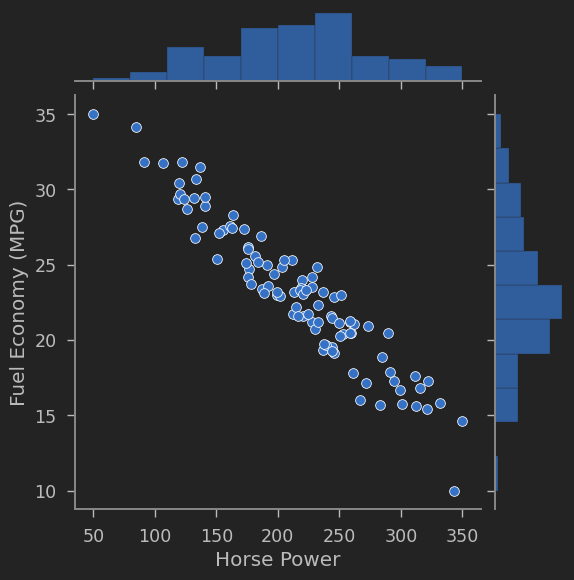

In [17]:
sns.jointplot(x='Horse Power', y='Fuel Economy (MPG)', data = Vhorse_df)


(75,)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [41]:
X= Vhorse_df['Horse Power']
y = Vhorse_df['Fuel Economy (MPG)']
X = np.array(X)
y = np.array(y)
# reshaping the array from (500,) to (500, 1)
X = X.reshape(-1,1)
print(X.shape)

# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
print(y.shape)

(100, 1)
(100, 1)


In [42]:
X_train.shape

(80, 1)

In [43]:
X_test.shape

(20, 1)

# STEP#5: TRAIN THE MODEL

In [46]:
from sklearn.linear_model import LinearRegression

SimpleLinearRegression = LinearRegression(fit_intercept =True)
SimpleLinearRegression.fit(X_train, y_train)

LinearRegression()

In [47]:
print('Linear Model Coeff(m)', SimpleLinearRegression.coef_)
print('Linear Model Coeff(b)', SimpleLinearRegression.intercept_)

Linear Model Coeff(m) [[-0.0711404]]
Linear Model Coeff(b) [38.51035621]


In [49]:
y_predict = SimpleLinearRegression.predict( y_test)
y_predict

array([[36.82293556],
       [37.79895221],
       [37.32278328],
       [37.47248332],
       [37.05855345],
       [36.97206109],
       [36.85227323],
       [37.13255611],
       [37.02365845],
       [37.3916272 ],
       [36.72262285],
       [36.46733124],
       [36.55588647],
       [37.00450294],
       [36.86094609],
       [36.97495836],
       [37.3992174 ],
       [36.41900154],
       [36.97403473],
       [37.39513684]])

In [50]:
y_test


array([[23.71958332],
       [10.        ],
       [16.69336865],
       [14.58907857],
       [20.40757083],
       [21.6233689 ],
       [23.3071922 ],
       [19.36733689],
       [20.89807976],
       [15.72564969],
       [25.12965002],
       [28.71821022],
       [27.47341504],
       [21.16734325],
       [23.18528033],
       [21.58264283],
       [15.61895639],
       [29.39756688],
       [21.59562606],
       [15.67631564]])

Text(0.5, 1.0, 'HP vs. MPG (Training dataset)')

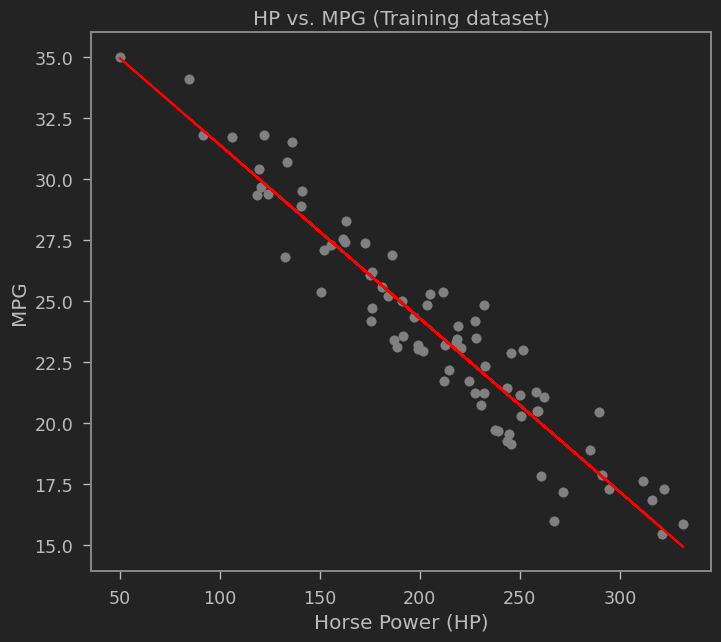

In [52]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, SimpleLinearRegression.predict(X_train), color = 'red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Training dataset)')

# STEP#6: TEST THE MODEL 

array([31.16351369, 30.18338488, 16.89806426, 27.89752324, 24.32128198,
       25.99172853, 20.9703114 , 15.99559275, 18.86323122, 26.01736625,
       21.99594879, 16.78559837, 26.0277818 , 19.87609111, 26.98934477,
       18.14738588, 17.27482988, 20.56246357, 14.52373796, 20.86239667,
       25.18104204, 35.31587722, 25.64176885, 29.69075191, 22.18705542])

87    31.722566
29    30.392613
71    16.693369
50    25.345632
80    23.172223
1     24.695934
47    19.536770
68    17.627480
54    20.898080
31    26.188478
60    20.715722
35    15.725650
5     24.173571
15    20.467374
95    27.418661
33    15.676316
7     17.274218
81    21.139429
86    15.837968
52    22.849711
3     23.384546
37    35.000000
65    25.575084
8     28.718210
36    23.488811
Name: Fuel Economy (MPG), dtype: float64

Text(0.5,1,'HP vs. MPG (Training dataset)')

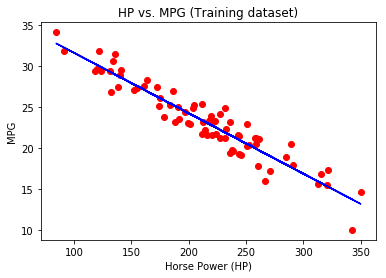

In [53]:
accuracy_LinearRegression = SimpleLinearRegression.score(X_test, y_test)
accuracy_LinearRegression

0.8905125398867078

In [56]:
# HP = [[240]]
# y_predict = regressor.predict(HP)
# y_predict
# Use the trained model to generate predictions

Temp = np.array([240])
Temp = Temp.reshape(-1,1)

y_predict = SimpleLinearRegression.predict(Temp)
print('Predictions =', y_predict)

Revenue Predictions = [[21.43666017]]


# EXCELLENT JOB! NOW YOU BECAME EXPERT IN SIMPLE LINEAR REGRESSION